# Titanic - Machine Learning from Diaster

网站：https://www.kaggle.com/competitions/titanic/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("titanic/train.csv")
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv("titanic/test.csv")
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.shape, test.shape

((891, 12), (418, 11))

利用`describe`获取数据的整体统计信息:
1. PassengerId：乘客的身份id 唯一值 离散型数据
2. Survived：本数据集的target，二元分类数据。key = 0, 1
3. Pclass：乘客的Ticket class（票务等级）， key = 1， 2，3 （一等，二等，三等）
4. Name：乘客的姓名， 字符串类型 unstructured data
5. Sex：乘客的性别，二元分类数据，key = male, female
6. Age：年龄，数值型数据，连续型数据
7. Sibsp：泰坦尼克号上的兄弟姐妹/配偶数量， 数值型数据，离散型数据
8. Parch：泰坦尼克号上父母/孩子的数量，数值型数据，离散型数据
9. Ticket：车票号码 唯一值
10. Fare：票价，数值型数据，连续型数据
11. Cabin：客舱号 /房间号
12. Embarked：起运港，分类数据。key = S, C, Q

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**初步分析**：
1. 我认为无需进行进一步分析的features是Name, PassengerId，Ticket. 数值是唯一的，没有进行分析的意义。 
2. 其次，Cabin数据有大量的NULL值，且基本没有集中趋势，没有分析的意义。
3. 数据包含的所有features中的分类数据有：Pclass, Sex, Embarked。这三种特征需要进行进一步处理。需要对分类数据进行编码
4. **剩下的features还有**：Age, Sibsp, Parch, Fare为数值型数据，其中Sibsp, Parch为离散型数据，Age, Fare为连续型数据

**总结**：
我认为可以进一步分析建模的features有Pclass, Sex, Embarked, Age, Sibsp, Parch, Fare

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**具有缺失值的数据**： Age, Embarked。需要进一步处理

## Exploratory Data Analysis 探索性数据分析

### 分类型数据

#### Pclass

In [5]:
pclass = data[['Pclass']].value_counts().reset_index(name='counts_class')
pclass

,Pclass,counts_class
0,3,491
1,1,216
2,2,184


In [6]:
data['Pclass'].mode()[0]

np.int64(3)

In [7]:
ax = pclass.plot.bar(x='Pclass', y='counts_class', legend=False, rot=0)
ax.set_xlabel("Ticket Class")
ax.set_ylabel("Count")

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

In [ ]:
pclass_dum = pd.get_dummies(data['Pclass'], prefix='class')
data =  data.join(pclass_dum)

In [51]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,class_1,class_2,class_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0


In [52]:
# 求相关性
data['Pclass'].corr(data['Survived'])

-0.3384810359610148

In [66]:
import seaborn as sns 
corrs = data.corr(method='spearman').drop(columns=['class_1','class_2','class_3'], index=['class_1','class_2','class_3'])
corrs[((corrs.abs()>=0.5)&(corrs.abs()<1)).any(axis=1)]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Pclass,-0.034091,-0.339668,1.000000,-0.361666,-0.043019,-0.022801,-0.688032
Fare,-0.013975,0.323736,-0.688032,0.135051,0.447113,0.410074,1.000000


#### Sex

#### Embarked

### 数值型数据

#### Age - 数值型数据

连续型数据or离散型数据？

In [8]:
# Estimation of Location
from scipy.stats import trim_mean
# mean
age_mean = data['Age'].mean()
# trim_mean
age_trim_mean = trim_mean(data['Age'].dropna(), 0.1)
print("Mean:{:.2f}".format(age_mean))
print("Trimmed Mean:{:.2f}".format(age_trim_mean))

# median 
age_median = data['Age'].median()
print("Median of Age:", age_median)

Mean:29.70
Trimmed Mean:29.27
Median of Age: 28.0


In [9]:
# Estimation of Variability
# std 
age_std = data['Age'].std()

# variance
age_var = data['Age'].var()

# mad - mean
age_mad = (data['Age'] - data['Age'].mean()).abs().sum()/data['Age'].count()

# mad - median
from scipy.stats import median_abs_deviation
# import statsmodels.robust as sr
age_median_mad = median_abs_deviation(data['Age'].dropna())
# age_median_mad = sr.scale.mad(data['Age'].dropna())


# IQR
iqr = data['Age'].quantile(0.75) - data['Age'].quantile(0.25)
# q1 = data['Age'].quantile(0.25)
# q3 = data['Age'].quantile(0.75)
q13 = data['Age'].quantile([0.25, 0.5, 0.75])

print(f"Standard deviation of Age:{age_std:.2f}")
print(f"Variance of Age: {age_var:.2f}")
print(f"Mean Absolute Deviation:{age_mad:.2f}")
print(f"Median Absolute Deviation:{age_median_mad:.2f}")
print(f"IQR 四分位距:{iqr:.2f}")
# print(f"25%-75%: {q1:.2f} - {q3:.2f}")
print(q13)

Standard deviation of Age:14.53
Variance of Age: 211.02
Mean Absolute Deviation:11.32
Median Absolute Deviation:9.00
IQR 四分位距:17.88
0.25    20.125
0.50    28.000
0.75    38.000
Name: Age, dtype: float64


Text(0, 0.5, 'Age')

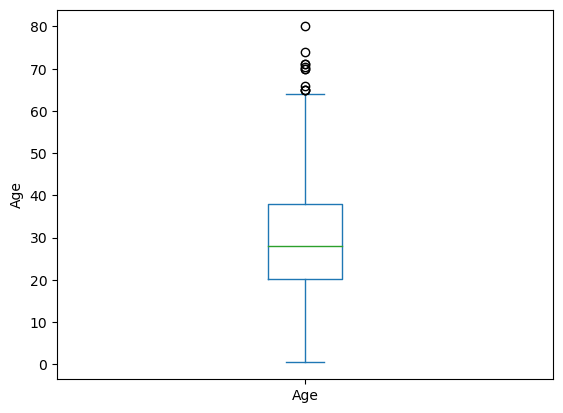

In [10]:
# Exploring the data distribution
# 箱线图 boxplot
ax1 = data['Age'].plot.box()
ax1.set_ylabel("Age")

可以从Age的箱线图看出，最小值大约0岁，最大值约80岁，中位数为28岁左右，25百分位数的值为20岁，75百分位数的值为38岁。其中超出65岁左右的为异常值，**有一定数量的异常值，接下来可以找出这些异常值**

In [11]:
# 频数表
ages = pd.cut(data['Age'], bins=8)
ages.value_counts(sort=False).reset_index(name='cnt')

,index,cnt
0,"(0.34, 10.368]",64
1,"(10.368, 20.315]",115
2,"(20.315, 30.263]",230
3,"(30.263, 40.21]",155
4,"(40.21, 50.158]",86
5,"(50.158, 60.105]",42
6,"(60.105, 70.052]",17
7,"(70.052, 80.0]",5


Text(0.5, 0, 'Age')

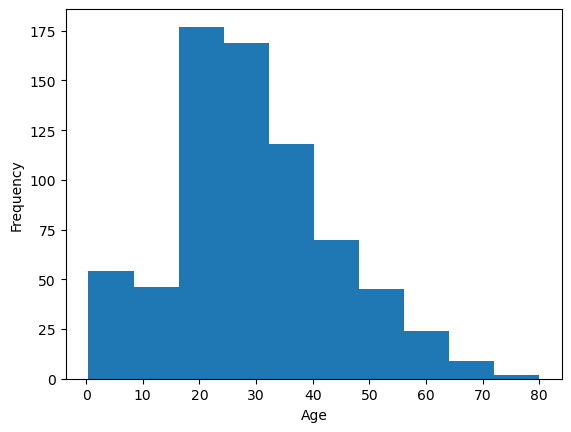

In [12]:
# 直方图
ax2 = data['Age'].plot.hist()
ax2.set_xlabel("Age")

<Axes: ylabel='Density'>

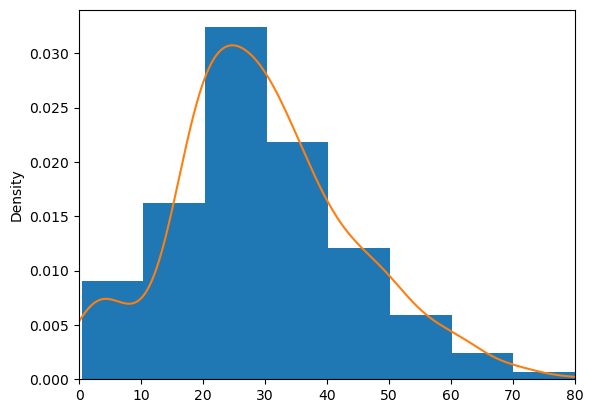

In [13]:
# 密度图
ax3 = data['Age'].plot.hist(density=True, xlim=[0,80],bins=8)
data['Age'].plot.density(ax = ax3)

In [14]:
# Skewness 偏度
skewness = data['Age'].skew()
print(f"The skewness of age is:{skewness:.2f}")
# Kurtosis 峰度
kurtosis = data['Age'].kurtosis()
print(f"The kurtosis of age is:{kurtosis:.2f}")

The skewness of age is:0.39
The kurtosis of age is:0.18


In [15]:
# correlation 相关性

data.corrwith(data['Age'])

PassengerId    0.036847
Survived      -0.077221
Pclass        -0.369226
Age            1.000000
SibSp         -0.308247
Parch         -0.189119
Fare           0.096067
dtype: float64

In [16]:
# Age vs Survived
data['Age'].corr(data['Survived'])

-0.07722109457217756

In [17]:
from scipy.stats import spearmanr
new = data.dropna(subset=['Age'])
corr, _ = spearmanr(new['Age'], new['Survived'])

In [18]:
# correlation between age and survived
corr

-0.05256530004469449

Text(0, 0.5, 'Age')

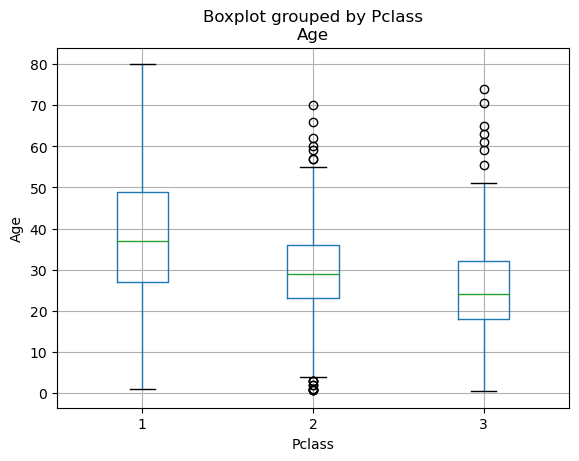

In [19]:
# Age vs Pclass
ax3 = data.boxplot(by='Pclass', column='Age')
ax3.set_xlabel("Pclass")
ax3.set_ylabel("Age")

Text(0, 0.5, 'Age')

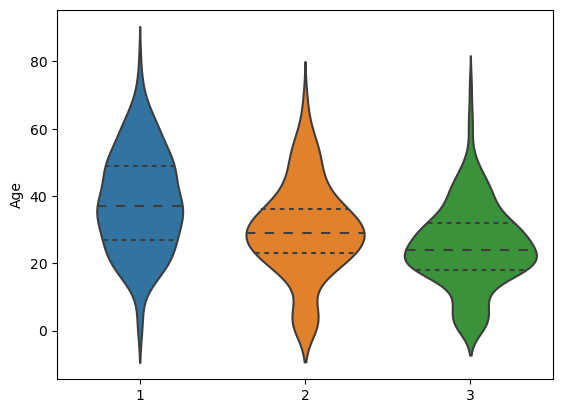

In [20]:
import seaborn as sns
ax4 = sns.violinplot(data=data, x='Pclass', y='Age', inner='quartile')
ax4.set_xlabel("")
ax4.set_ylabel("Age")

Text(0, 0.5, 'Age')

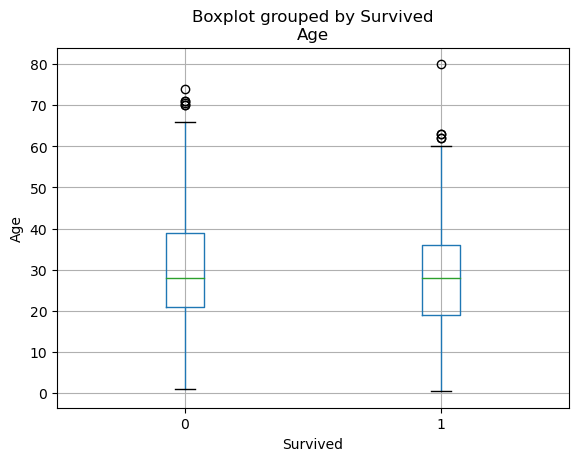

In [21]:
# Age vs Survived
ax4 = data.boxplot(by='Survived', column='Age')
ax4.set_xlabel("Survived")
ax4.set_ylabel("Age")

In [25]:
# Nan值的百分比，最好不要超过10%
na_percent = 100*(data['Age'].isnull()).mean()
na_percent

19.865319865319865

**初步决定在Data中去除Age列，这一列的值NULL值过多，且与Survived列相关性不大。有待进一步商榷**

In [ ]:
# 填充缺失值
data.fillna(value={'Age':data['Age'].mean()}, inplace=True)

#### Fare 票价

从上面的数据初步统计信息可以看出，Fare的均值和中心值差距很大，标准差也很大，说明数据分布较分散。
下面进行进一步探索。

In [31]:
from scipy.stats import trim_mean
trim_mean(data['Fare'], 0.1)

21.37871556802244

频数表

In [32]:
binned = pd.cut(data['Fare'], 5)
binned.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

In [33]:
data['Embarked'].mode()[0]

'S'

<Axes: xlabel='Pclass', ylabel='Age'>

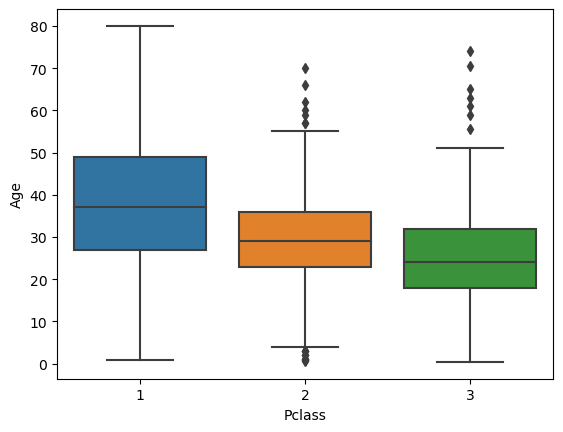

In [21]:
import seaborn as sns 
sns.boxplot(data, x='Pclass', y='Age')

#### Sibsp

#### Parch